# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score

# Data Exploration and Exploitation

In [2]:
df=pd.read_csv("../input/fraude-detection-db/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Shape of the dataset**

In [3]:
df.shape

(6362620, 11)

**Summary about our Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Transform all object values to numeric values**

**Extract new columns,the first contains the first letter of the nameOrig and another one contains the rest of the nameOrig**

In [5]:
df['NameOrgFirst']=df.nameOrig.str[0]
df['NameOrgLast']=df.nameOrig.str[1:]

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NameOrgFirst,NameOrgLast
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C,1231006815
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,C,1666544295
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,1305486145
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,840083671
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,C,2048537720


**Extract new columns,the first contains the first letter of the nameDest and another one contains the rest of the nameDest**

In [7]:
df['NameDestFirst']=df.nameDest.str[0]
df['NameDestLast']=df.nameDest.str[1:]

In [8]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [9]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NameOrgFirst,NameOrgLast,NameDestFirst,NameDestLast
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,C,1231006815,M,1979787155
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,C,1666544295,M,2044282225
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,C,1305486145,C,553264065
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,C,840083671,C,38997010
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,C,2048537720,M,1230701703


In [10]:
df1=pd.get_dummies(data=df,columns=['NameOrgFirst','NameDestFirst','type'])

In [11]:
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NameOrgLast,NameDestLast,NameOrgFirst_C,NameDestFirst_C,NameDestFirst_M,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1231006815,1979787155,1,0,1,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1666544295,2044282225,1,0,1,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,1305486145,553264065,1,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,840083671,38997010,1,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,2048537720,1230701703,1,0,1,0,0,0,1,0


**Drop all the NaN values**

In [12]:
df1.dropna()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NameOrgLast,NameDestLast,NameOrgFirst_C,NameDestFirst_C,NameDestFirst_M,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,1231006815,1979787155,1,0,1,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1666544295,2044282225,1,0,1,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,1305486145,553264065,1,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,840083671,38997010,1,1,0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,2048537720,1230701703,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,786484425,776919290,1,1,0,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,1529008245,1881841831,1,1,0,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1162922333,1365125890,1,1,0,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,1685995037,2080388513,1,1,0,0,0,0,0,1


**Transform the object columns to int columns**

In [13]:
df1['NameOrgLast']=pd.to_numeric(df1['NameOrgLast'], downcast='integer')
df1['NameDestLast']=pd.to_numeric(df1['NameDestLast'], downcast='integer')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   amount           float64
 2   oldbalanceOrg    float64
 3   newbalanceOrig   float64
 4   oldbalanceDest   float64
 5   newbalanceDest   float64
 6   isFraud          int64  
 7   isFlaggedFraud   int64  
 8   NameOrgLast      int32  
 9   NameDestLast     int32  
 10  NameOrgFirst_C   uint8  
 11  NameDestFirst_C  uint8  
 12  NameDestFirst_M  uint8  
 13  type_CASH_IN     uint8  
 14  type_CASH_OUT    uint8  
 15  type_DEBIT       uint8  
 16  type_PAYMENT     uint8  
 17  type_TRANSFER    uint8  
dtypes: float64(5), int32(2), int64(3), uint8(8)
memory usage: 485.4 MB


**drop all the NaN and infinite values**

In [15]:
df_new = df1[np.isfinite(df1).all(1)]

**Reshape the dataset because it is too large**

In [16]:
df_new=df_new.drop(df_new.index[40000:])

In [17]:
df_new.shape

(40000, 18)

# Fixing the parameters 

In [18]:
x=df_new.drop('isFraud',axis=1).values
y=df_new.isFraud.values
y=y.reshape(-1,1)

# Model Training

**Splitting to test and train sets**

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

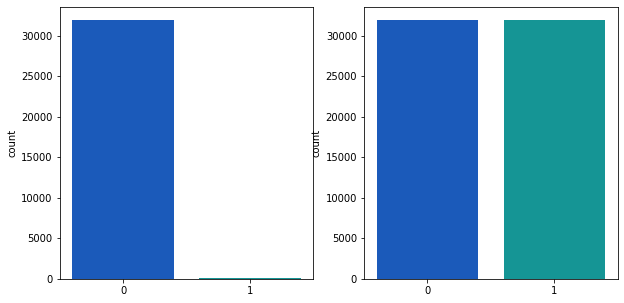

In [25]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 42)
x_train_eq , y_train_eq = smt.fit_resample(x_train , y_train)
x_test_eq , y_test_eq=smt.fit_resample(x_test,y_test)
x_train_eq.shape
y_train_eq = y_train_eq.reshape(-1,1)
fig, axs = plt.subplots(ncols=2,figsize = (10,5))
sns.countplot(x= y_train.reshape(-1) , ax=axs[0], palette ="winter");
sns.countplot(x= y_train_eq.reshape(-1), ax=axs[1] , palette ="winter");

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc=sc.fit_transform(x_train_eq)
y_train_sc=sc.fit_transform(y_train_eq)
x_test_sc=sc.fit_transform(x_test_eq)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_sc,y_train_eq)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [28]:
y_predictKNN=knn.predict(x_test_sc)
print(confusion_matrix(y_test_eq,y_predictKNN))
print('Accuracy KNN :{0:.3f}'.format(accuracy_score(y_test_eq,y_predictKNN)))
print('Precision KNN :{0:.3f}'.format(precision_score(y_test_eq,y_predictKNN)))

[[7884  100]
 [2493 5491]]
Accuracy KNN :0.838
Precision KNN :0.982


# Accuracy KNN :0.838
# Precision KNN :0.982
